### Required Libraries

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

### Data

In [16]:
data = pd.read_csv("../../Datasets/penguins.csv")

In [17]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [18]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [19]:
data = data.dropna()

In [20]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [21]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [22]:
data['sex'] = (data['sex'] == "MALE").astype(int)
data['sex'].unique()

array([1, 0])

In [27]:
min_max = MinMaxScaler()
data_scaled = pd.DataFrame(min_max.fit_transform(data), columns=data.columns)

In [28]:
data_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.060990,0.291667,1.0
1,0.269091,0.511905,0.061964,0.305556,0.0
2,0.298182,0.583333,0.063718,0.152778,0.0
3,0.167273,0.738095,0.063328,0.208333,0.0
4,0.261818,0.892857,0.062744,0.263889,1.0


### Using Models

#### KMeans

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)  

In [31]:
# Check cluster assignments
print(data.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  \
0              39.1             18.7              181.0       3750.0    1   
1              39.5             17.4              186.0       3800.0    0   
2              40.3             18.0              195.0       3250.0    0   
4              36.7             19.3              193.0       3450.0    0   
5              39.3             20.6              190.0       3650.0    1   

   KMeans_Cluster  
0               2  
1               0  
2               0  
4               0  
5               2  


#### DBSCAN

In [41]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Adjust `eps` based on dataset
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

In [42]:

# Check cluster assignments (-1 indicates noise/outliers)
print(data.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  \
0              39.1             18.7              181.0       3750.0    1   
1              39.5             17.4              186.0       3800.0    0   
2              40.3             18.0              195.0       3250.0    0   
4              36.7             19.3              193.0       3450.0    0   
5              39.3             20.6              190.0       3650.0    1   

   KMeans_Cluster  DBSCAN_Cluster  
0               2               0  
1               0               1  
2               0               1  
4               0               1  
5               2               0  


### Results

In [43]:
data.DBSCAN_Cluster.unique()

array([ 0,  1, -1])

In [40]:
data.KMeans_Cluster.unique()

array([2, 0, 1], dtype=int32)

Cant get db scan to instantly get 3 clusters

### Plots

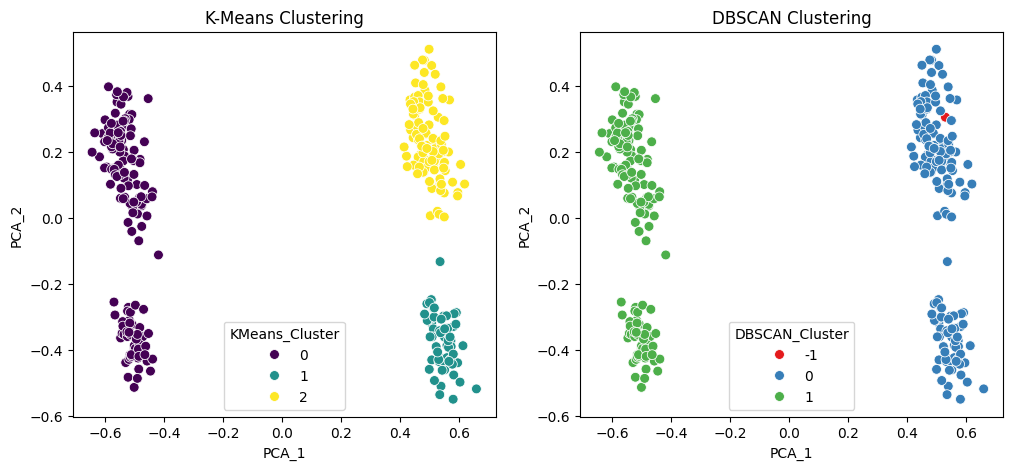

In [45]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Add PCA results to DataFrame
data['PCA_1'] = X_pca[:, 0]
data['PCA_2'] = X_pca[:, 1]

# Plot K-Means clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['PCA_1'], y=data['PCA_2'], hue=data['KMeans_Cluster'], palette='viridis', s=50)
plt.title("K-Means Clustering")

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['PCA_1'], y=data['PCA_2'], hue=data['DBSCAN_Cluster'], palette='Set1', s=50)
plt.title("DBSCAN Clustering")

plt.show()

<Figure size 6000x6000 with 0 Axes>

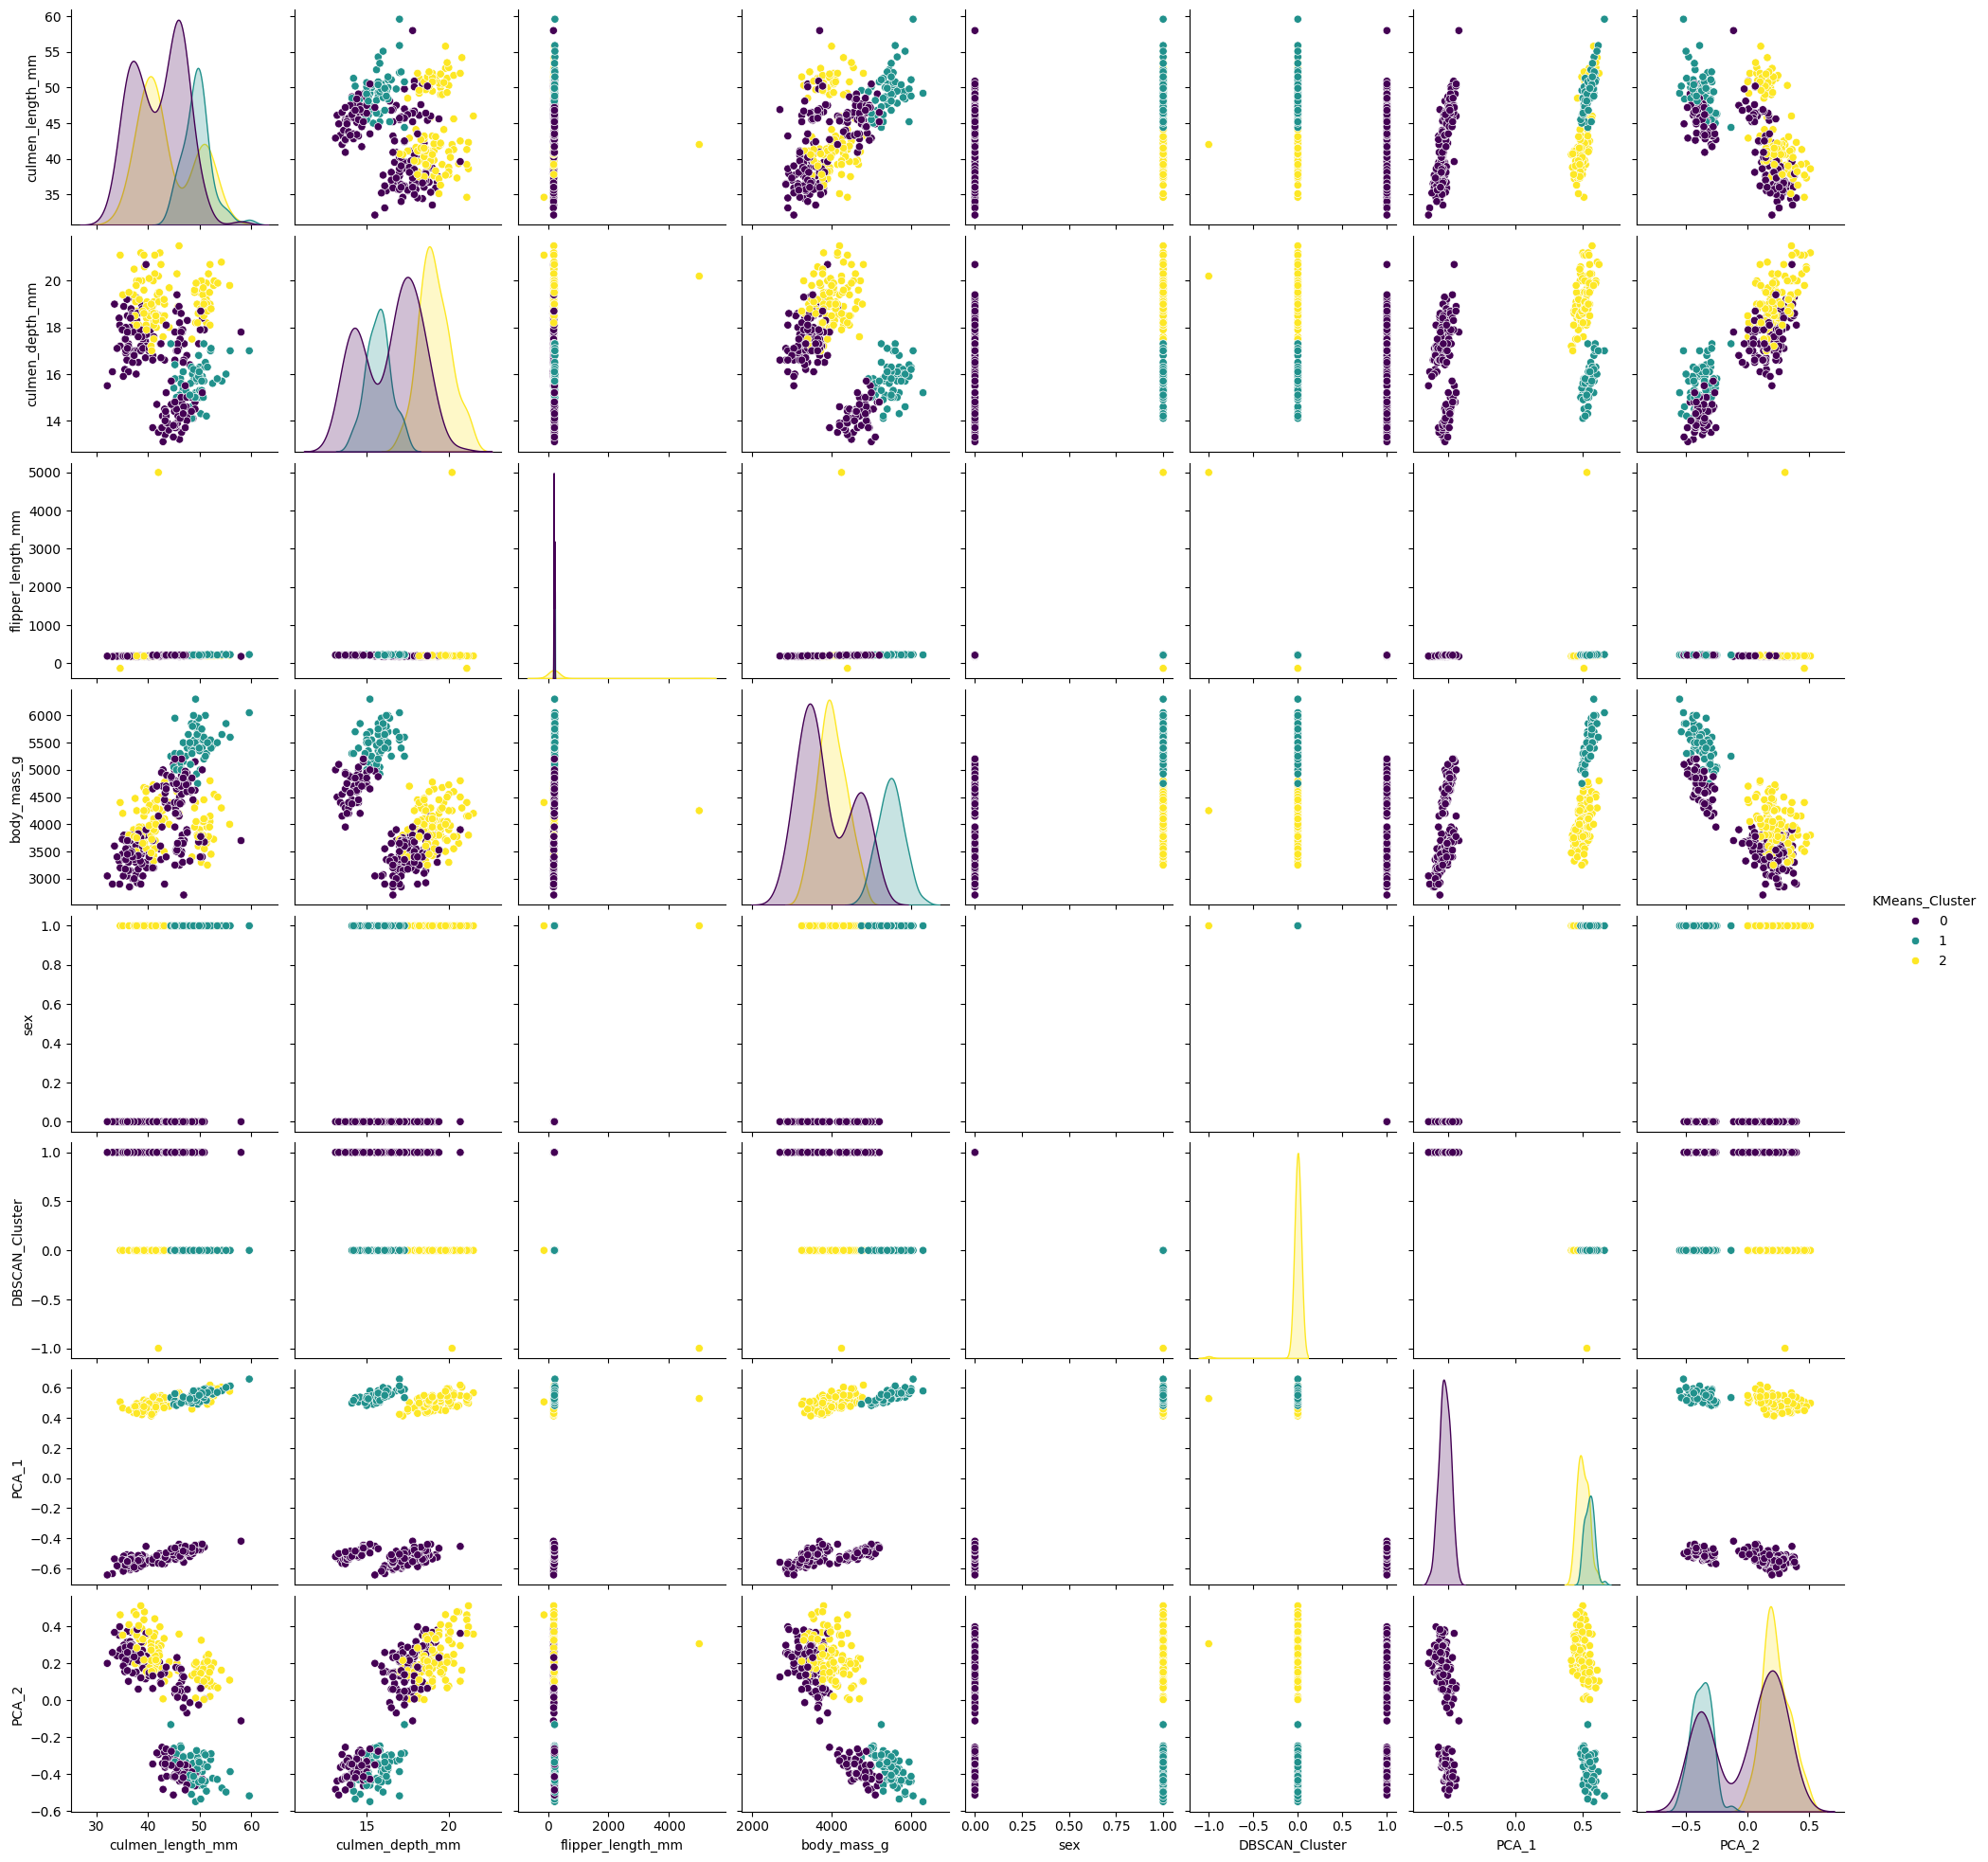

In [49]:
plt.figure(figsize=(60, 60))  # Adjust the size to fit your dataset
sns.pairplot(data, hue="KMeans_Cluster", palette="viridis")
plt.show()

### To do

1. Perform clustering on more complex data sets, use only kmeans
2. Use of elbow point for best number of clusters